# Simple Model

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
class_names = [str(i) for i in range(10)]

In [13]:
data = {
    "train_labels": train_labels,
    "test_labels": test_labels,
    "train_images": train_images,
    "test_images": test_images,
}

## type

In [16]:
for key in data:
    print(f"{key} : {type(data[key])}")

train_labels : <class 'numpy.ndarray'>
test_labels : <class 'numpy.ndarray'>
train_images : <class 'numpy.ndarray'>
test_images : <class 'numpy.ndarray'>


## shape

In [18]:
for key in data:
    print(f"{key} : {data[key].shape}")

train_labels : (60000,)
test_labels : (10000,)
train_images : (60000, 28, 28)
test_images : (10000, 28, 28)


In [19]:
for key in data:
    print(f"{key} : {data[key].min()}, {data[key].max()}")

train_labels : 0, 9
test_labels : 0, 9
train_images : 0, 255
test_images : 0, 255


## labels

In [22]:
print(f"trail_labels : {np.unique(train_labels)}")
print(f"trail_labels : {np.unique(test_labels)}")

trail_labels : [0 1 2 3 4 5 6 7 8 9]
trail_labels : [0 1 2 3 4 5 6 7 8 9]


## sample

In [23]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

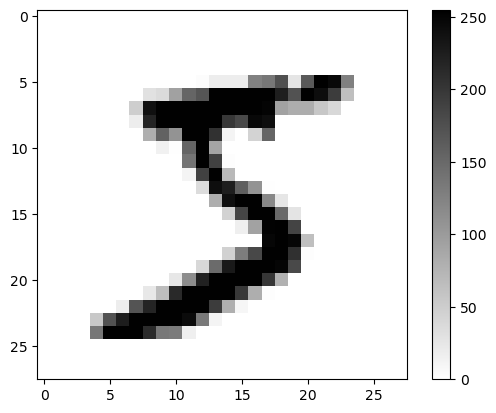

In [31]:
plt.imshow(train_images[0,:,:], cmap=plt.cm.binary)
plt.colorbar()
train_labels[0]

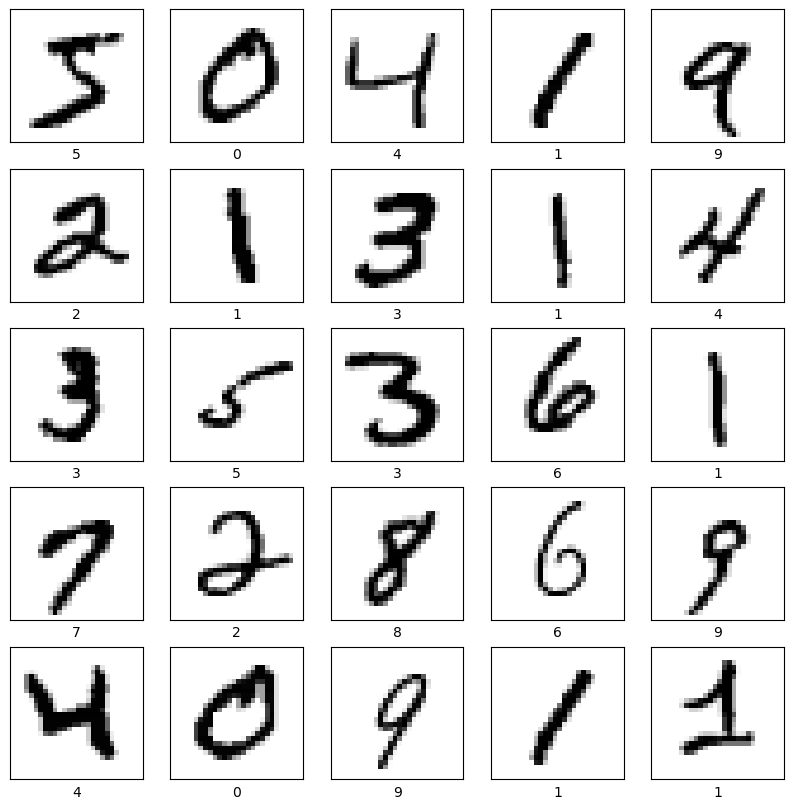

In [46]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])